In [33]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [37]:
import geocoder

In [38]:
from geopy.geocoders import Nominatim

In [39]:
#from geopy.geocoders.options import default_user_agent

In [40]:
geolocator = Nominatim(user_agent="nightlights_locator", timeout=10)

Reference latitude and longitude for India's center (approximate values)

In [41]:
reference_lat = 20.5             #20.5
reference_lon = 82.5             #82.5

In [42]:
import cv2

image_path = (r'C:\Users\Administrator\Desktop\565-by-600.jpg')
image = cv2.imread(image_path)

height, width = image.shape[:2]

print(f"Image dimensions (width x height): {width} x {height} pixels")

Image dimensions (width x height): 461 x 481 pixels


In [43]:
# Calculate the center pixel coordinates
center_x = width // 2
center_y = height // 2

# Get the pixel value at the center
center_pixel_value = image[center_y, center_x]

print(f"Center Pixel Value (BGR): {center_pixel_value}")
print(center_x)
print(center_y)

Center Pixel Value (BGR): [ 0  0 17]
230
240


Calculate approximate pixel-to-lat and pixel-to-lon scaling factors

In [44]:
image_width = 504
image_height = 481

approx_lat_extent = 33.0 - 8.0  # degrees
approx_lon_extent = 97.0 - 68.0  # degrees

pixel_to_lat_scale = approx_lat_extent / image_height
pixel_to_lon_scale = approx_lon_extent / image_width

print(f"Pixel-to-Latitude Scale: {pixel_to_lat_scale} degrees/pixel")
print(f"Pixel-to-Longitude Scale: {pixel_to_lon_scale} degrees/pixel")

Pixel-to-Latitude Scale: 0.05197505197505198 degrees/pixel
Pixel-to-Longitude Scale: 0.057539682539682536 degrees/pixel


In [45]:
nightlights_image = cv2.imread(r'C:\Users\Administrator\Desktop\565-by-600.jpg', cv2.IMREAD_GRAYSCALE)

Otsu's Method to calculate the threshold value

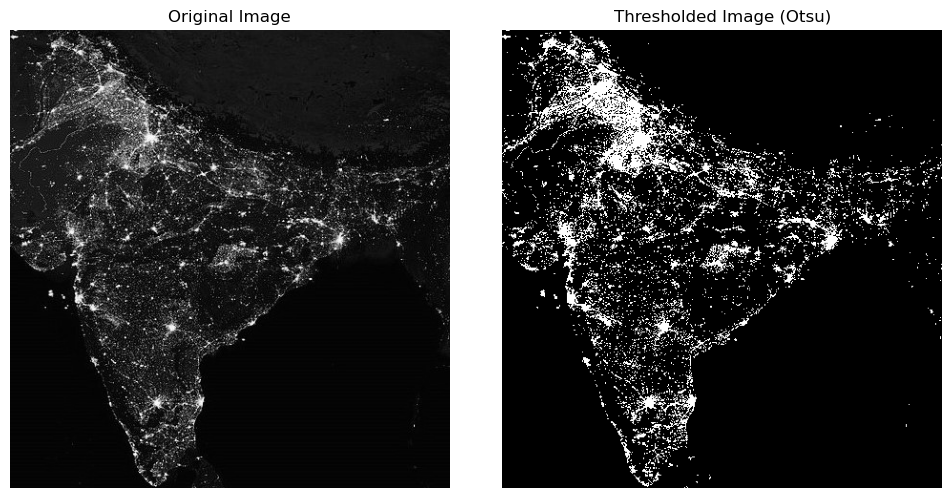

Otsu Threshold Value: 69.0


In [46]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
_, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and thresholded images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image (Otsu)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Get the Otsu-calculated threshold value
threshold_value = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[0]
print(f"Otsu Threshold Value: {threshold_value}")


In [47]:
threshold_value = 69

In [48]:
_, binary_image = cv2.threshold(nightlights_image, threshold_value, 255, cv2.THRESH_BINARY)

Find contours in the binary image

In [49]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Preparing a blank image for visualization

In [50]:
visualization_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)

Process each contour and calculate area, latitude, and longitude

In [51]:
# total_area = 0

# for contour in contours:
#     area = cv2.contourArea(contour)
    
#     # Skip contours with small or zero area
#     if area < threshold_value:  
#         continue
    
#     # Calculate the centroid of the contour
#     M = cv2.moments(contour)
#     cx = int(M['m10'] / (M['m00'] + 1e-5))
#     cy = int(M['m01'] / (M['m00'] + 1e-5))
    
#     # Convert pixel coordinates to latitude and longitude
#     latitude = reference_lat + (cy * pixel_to_lat_scale)
#     longitude = reference_lon + (cx * pixel_to_lon_scale)

#     print(f"Area: {area}, Latitude: {latitude}, Longitude: {longitude}")
    
#     # Draw the contour on the visualization image
#     cv2.drawContours(visualization_image, [contour], -1, (0, 255, 0), 2)
#     cv2.putText(visualization_image, f"Area: {area:.2f}", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
#     # Accumulate the total area
#     total_area += area

In [53]:
locations = []
total_area_sq_km = 0
label_counter = 1

for contour in contours:
    area = cv2.contourArea(contour)
    
    # Skip contours with small or zero area
    if area < threshold_value:
        continue
    
    # Calculate the centroid of the contour
    M = cv2.moments(contour)
    cx = int(M['m10'] / (M['m00'] + 1e-5))
    cy = int(M['m01'] / (M['m00'] + 1e-5))
    
    # Calculate the bounding rectangle for the contour
    x, y, w, h = cv2.boundingRect(contour)
    cx = x + w // 2
    cy = y + h // 2
    
    # Convert pixel coordinates to latitude and longitude
    latitude = reference_lat + (cy * pixel_to_lat_scale)
    longitude = reference_lon + (cx * pixel_to_lon_scale)
    
    # Check if the center pixel value is greater than the contour's centroid pixel value
#     if center_pixel_value[0] > 230 and center_pixel_value[1] > 240:
#         latitude = reference_lat - (cy * pixel_to_lat_scale)
#         longitude = reference_lon - (cx * pixel_to_lon_scale)
#     else:
#         latitude = reference_lat + (cy * pixel_to_lat_scale)
#         longitude = reference_lon + (cx * pixel_to_lon_scale)
    
#     # Convert latitude and longitude to address using geopy
#     location = geolocator.reverse((latitude, longitude), exactly_one=True)
#     if location:
#         locations.append({
#             "latitude": latitude,
#             "longitude": longitude,
#             "area_sq_km": area * pixel_to_lat_scale * pixel_to_lon_scale,
#             "address": location.address
#         })
    
     # Convert latitude and longitude to degrees, minutes, and seconds format
    def convert_to_dms(coord):
        degrees = int(coord)
        minutes = int((coord - degrees) * 60)
        seconds = (coord - degrees - minutes / 60) * 3600
        return degrees, minutes, seconds
    
    latitude_deg, latitude_min, latitude_sec = convert_to_dms(latitude)
    longitude_deg, longitude_min, longitude_sec = convert_to_dms(longitude)
    
    latitude_dir = "N" if latitude >= 0 else "S"
    longitude_dir = "E" if longitude >= 0 else "W"
    
    # Calculate area in square kilometers
    area_sq_km = (area * pixel_to_lat_scale * pixel_to_lon_scale)  # Convert to square kilometers
    
    # Assign a numerical label to the area
    label = str(label_counter)
    label_counter += 1
    
#     # Perform reverse geocoding
#     location = geolocator.reverse((latitude, longitude), language='en')
#     address = location.address if location else "Not found"
    
    # Perform reverse geocoding using geopy
#     location = geolocator.reverse((latitude, longitude), exactly_one=True)
    location = geolocator.reverse((latitude, longitude), language='en', exactly_one=True)

    if location:
        address = location.address
        gps_location = location.point
        gps_latitude = gps_location.latitude
        gps_longitude = gps_location.longitude
    else:
        address = "Not found"
        gps_latitude = None
        gps_longitude = None
    
#     print(f"Area: {area_sq_km:.2f} sq. km, Latitude: {latitude}, Longitude: {longitude}")
#     print(f"Address: {address}")
        
#    print(f"Area: {area_sq_km:.2f} sq. km")
#    print(f"Latitude: {latitude}, Longitude: {longitude}")
    print(f"Label: {label}, Area: {area_sq_km:.2f} sq. km")
    print(f"Latitude: {latitude_deg}° {latitude_min}' {latitude_sec:.2f}\" {latitude_dir}, Longitude: {longitude_deg}° {longitude_min}' {longitude_sec:.2f}\" {longitude_dir}")
    print(f"Address: {address}")
    print(f"GPS Location: Latitude: {gps_latitude}, Longitude: {gps_longitude}")
    
    # Draw the contour on the visualization image
    cv2.drawContours(visualization_image, [contour], -1, (0, 255, 0), 2)
#     cv2.putText(visualization_image, f"Area: {area_sq_km:.2f} sq. km", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.putText(visualization_image, label, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    # Accumulate the total area in square kilometers
    total_area_sq_km += area_sq_km

print(f"Total Area: {total_area_sq_km:.2f} sq. km")


Label: 1, Area: 1.41 sq. km
Latitude: 41° 14' 16.96" N, Longitude: 92° 23' 48.57" E
Address: Qaradowe Town, Yizhou District, Hami, Xinjiang, China
GPS Location: Latitude: 42.8720498, Longitude: 92.8378238
Label: 2, Area: 0.48 sq. km
Latitude: 36° 52' 19.71" N, Longitude: 92° 16' 54.29" E
Address: Urt Moron, Golmud, Haixi, Qinghai, China
GPS Location: Latitude: 36.9087751, Longitude: 93.1602226
Label: 3, Area: 0.91 sq. km
Latitude: 35° 40' 36.17" N, Longitude: 87° 51' 4.29" E
Address: Tsodrel Jangma, Shuanghu County, Nagqu City, Tibet, China
GPS Location: Latitude: 33.3013306, Longitude: 87.7552582
Label: 4, Area: 0.21 sq. km
Latitude: 33° 48' 20.21" N, Longitude: 99° 49' 10.00" E
Address: 张掖 - 孟连, Gadê County, Golog, Qinghai, China
GPS Location: Latitude: 33.80904878241428, Longitude: 99.81774172058896
Label: 5, Area: 1.09 sq. km
Latitude: 32° 58' 26.44" N, Longitude: 95° 57' 51.43" E
Address: Ratö, Yushu City, Yushu, Qinghai, China
GPS Location: Latitude: 32.8534766, Longitude: 96.583

In [ ]:
# # Print location information
# for loc in locations:
#     print(f"Latitude: {loc['latitude']}, Longitude: {loc['longitude']}")
#     print(f"Area: {loc['area_sq_km']:.2f} sq. km")
#     print(f"Address: {loc['address']}\n")

Showing the visualization image

In [ ]:
plt.imshow(cv2.cvtColor(visualization_image, cv2.COLOR_BGR2RGB))
plt.title("Nighttime Lights")
plt.axis('off')
plt.show()

In [ ]:
# Create a figure for visualization
plt.figure(figsize=(10, 10))

# Display the original image with marked light areas
plt.imshow(cv2.cvtColor(nightlights_image, cv2.COLOR_BGR2RGB))
plt.title(f"Original Image with Marked Light Areas\nTotal Lighted Area: {total_area_sq_km:.2f}")
plt.axis('off')
plt.show()

In [ ]:
print(f"Total Lighted Area: {total_area_sq_km:.2f}")